In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import pandas as pd
# import numpy as np

# # Read the CSV file of 21th person's low MWL data
# df=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv')
# display(df)    # 2nd person's low mwl data

Sample input signal

In [3]:
# # A person's low mental workload data

# # Extract required gsr values
# gsr_1 =df['Trial 1:0back']
          
# gsr_2 = df['Trial 6:0back']


          

In [4]:
# # set sampling rate of gsr data to be 256 Hz
          
# sampling_rate=256

# # create a time array based on sampling rate and length of gsr values

# time=np.arange(len(gsr_1))/sampling_rate

# # plot the gsr values against time
# fig, axes = plt.subplots(2, figsize=(12,12))

# # top panel shows the input signal
# ax=axes[0]
# ax.plot(time,gsr_1)
# ax.set_ylabel('Amplitude')
# ax.set_title('GSR')

# ax=axes[1]
# ax.plot(time, gsr_2)
# ax.set_ylabel('Amplitude')
# ax.set_xlabel('Time(sec)')



**Consider set 1 as first 768 rows of data**

In [5]:
# set1=df.iloc[0:768]
# set1

In [6]:
# # Read the CSV file of 21th person's high MWL data
# df=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p10h.csv')
# display(df)    # 2nd person's low mwl data

In [7]:
# # A person's high mental workload data

# # Extract required gsr values
# gsr_1_h =df['Trial 3:3back']
          
# gsr_2_h = df['Trial 5:3back']

# # plot the gsr values against time
# fig, axes = plt.subplots(2, figsize=(12,12))

# # top panel shows the input signal
# ax=axes[0]
# ax.plot(time,gsr_1_h)
# ax.set_ylabel('Amplitude')
# ax.set_title('GSR')

# ax=axes[1]
# ax.plot(time, gsr_2_h)
# ax.set_ylabel('Amplitude')
# ax.set_xlabel('Time(sec)')


In [8]:
# # Read the CSV file of 8th person's high MWL data
# df=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p10h.csv')
# display(df)    # 8th person's high mwl data




In [9]:
# # A person's high mental workload data

# # Extract required gsr values
# gsr_8_h =df['Trial 3:3back']
          
# gsr_8_h = df['Trial 5:3back']

# # plot the gsr values against time
# fig, axes = plt.subplots(2, figsize=(12,12))

# # top panel shows the input signal
# ax=axes[0]
# ax.plot(time,gsr_8_h)
# ax.set_ylabel('Amplitude')
# ax.set_title('GSR')

# ax=axes[1]
# ax.plot(time, gsr_8_h)
# ax.set_ylabel('Amplitude')
# ax.set_xlabel('Time(sec)')

 
#  Feature Extraction Method From Research Paper: Toward Dynamically Adaptive Simulation Multimodal
 
 Feature                                   Description

 RT           =            Rise time from SCR onset to peak response
 
 
 
 HRT         =             Half recovery time of the SCR peak
 
 
 Amp            =          Amplitude of the skin conductance response at its peak   
 
 Area       =              Area of the skin conductance response
 
 Prom        =             Prominence of skin conductance response relative to the skin conductance level            
 
 SCL         =             Skin conductance level, the average electrodermal response          
 
 MAV1Diff SCL    =            First derivative of the mean absolute value of the skin conductance level
 
 MAV2Diff SCL    =         Second derivative of the mean absolute value of the skin conductance level
 
 BP             =          Band power power of the GSR signal
 
 PSD       =              Power spectrum density estimate of the GSR signal
 
 
 


Compute and extract the above features and label whether there is high or low mental workload

- correlate to stress 
- low mental workload would indicate that there is a coping mechanism

# Computing features

In [10]:
from scipy.signal import find_peaks

Feature Extraction Method: Continous Wavelet Transform 

- time frequency : info on how GSR signal evolves over time
- multi scale analysis: detect both short term & long term changes in skin conductance
- capture transient events : such as sudden changes due to stress level

use PyWavelets to compute CWT

use CWT coefficients to extract features

for each entry of csv (person)

------------------ energy per scale  | entropy | band power | dominantfrequency | 


p1: 

p2: 

...

In [11]:
# # import pandas as pd
# # import numpy as np
# # # Loading the CSV file
# # df=pd.read_csv('/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv')
# # display(df)    # 2nd person's low mwl data

# display(df) # 2nd person's low mwl data

**Consider set 1 as first 768 rows of the data**

In [12]:
# sc_X = StandardScaler()
# X = sc_X.fit_transform(set1) # gives an array of preprocessed values

# X

In [13]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# import matplotlib.pyplot as plt

# set1=df.iloc[0:768]
# set1



**Applying preprocessing as standard scaling**

In [14]:
# X.shape # checking shape of array

In [15]:
# xdf=pd.DataFrame(X) # converting array into dataframe

# xdf[0] # scaledvalues of column 1

In [16]:
# sampling_rate = 256 
# signal=xdf[0].values

# t=np.arange(len(signal))/sampling_rate

In [17]:
# s = set1[['Trial 1:0back']].values
# fig, axes = plt.subplots(2, figsize = (12, 12))

# # input signal vs preprocessed signal

# ax=axes[0]
# ax.plot(t,s)
# ax.set_ylabel('Amplitude')
# ax.set_title('Input GSR')

# ax = axes[1]
# ax.plot(t, signal)
# ax.set_ylabel('Amplitude')
# ax.set_xlabel('Time(sec)')
# ax.set_title('Preprocessed GSR')

# **Continuous Wavelet Transform (CWT)**

Reference: https://www.kaggle.com/code/krishd123/galva-sensing-study-of-gsr-signals

CWT to analyze both time and frequency characteristics of signals simultaneously

- Involves scaling and translating a wavelet function across the signal to capture different frequency components at various time scales

- Result is a time-frequency representation known as scalogram for tasks like signal denoising, feature extraction, and pattern recognition

- CWT is advantageous for continuous analysis capability but can be computationally intensive compared to the Discrete Wavelet Transform (DWT)


In [18]:
import pywt

In [19]:
wavlist = pywt.wavelist(kind='continuous')
wavlist

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

Normally used(supported) wavelets:

* Mexican Hat (mexh),
* Morlet (morl),
* Complex Morlet (cmorB-C),
* Gaussian Derivative (gausP),
* Complex Gaussian Derivative (cgauP)
* Shannon (shanB-C),
* Frequency B-Spline (fbspB-C)

In [20]:
# l = len(signal)
# wavelet = 'morl'

# # calculate nyquist frequency (nf)
# nyquist_freq = sampling_rate /2
# # although min scale is taken as 1/nf
# # it is too small here and so 
# mins =1
# maxs=270
# scales=np.arange(mins,maxs+1)

# '''
# CWT using Python wavelet module (pywt)
# - signal: input signal (array)
# - scales: scales to be used for CWT (array)
# - wavelet: name of wavelet used (string)

# - Other parameters:
# - method: {'conv' , 'fft'} (optional)
# - sampling_period: seconds for output freqs (float) (optional)
# - axis: a number (int) (optional)

# '''

# coef , freqs = pywt.cwt(signal , scales,wavelet)

# # coef : CWT coefficients (array)
# # freqs : frequencies corresponding to scales (array)


In [21]:
# coef.shape

In [22]:
# freqs.shape

**Visualizing CWT**

In [23]:
# PLOTTING SCALOGRAM



# Merge CSV files (NEW method)

In [24]:
import os
import pandas as pd

# Define the directories for Low and High workload data
low_mwl_dir = '/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/'
high_mwl_dir = '/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/'

# Get list of files in Low_MWL directory, filter only '.csv' files, and sort them
low_mwl_files = sorted([os.path.join(low_mwl_dir, f) for f in os.listdir(low_mwl_dir) if f.endswith('.csv')])[:11]

# Get list of files in High_MWL directory, filter only '.csv' files, and sort them
high_mwl_files = sorted([os.path.join(high_mwl_dir, f) for f in os.listdir(high_mwl_dir) if f.endswith('.csv')])[:11]


# def combine_low_csv_files(low_mwl_files):
    

# Load the first CSV file from Low_MWL
low_mwl_sample = pd.read_csv(low_mwl_files[0])
print("Low Mental Workload CSV Data (First file):")
# print(low_mwl_sample.head())  # Display the first 5 rows
display(low_mwl_sample)

# Load the first CSV file from High_MWL
high_mwl_sample = pd.read_csv(high_mwl_files[0])
print("\nHigh Mental Workload CSV Data (First file):")
# print(high_mwl_sample.head())  # Display the first 5 rows
display(high_mwl_sample)

high_mwl_sample_second = pd.DataFrame() 
high_mwl_sample_second['Trial 5:3back'] = high_mwl_sample['Trial 5:3back']
print("+++++++++++++++++++")
display(high_mwl_sample_second)

high_mwl_sample_second_trans = high_mwl_sample_second.T
print("$$$$$$$$$$$$$$$$$#")
print("\nHigh Mental Workload CSV Data (First file - Transposed & Only using 2nd trial):")
display(high_mwl_sample_second_trans)



Low Mental Workload CSV Data (First file):


,Trial 1:0back,Trial 6:0back
0,0.632,5.097
1,0.633,5.097
2,0.633,5.096
3,0.633,5.095
4,0.633,5.095
...,...,...
76795,0.614,3.921
76796,0.614,3.922
76797,0.614,3.921
76798,0.614,3.921



High Mental Workload CSV Data (First file):


,Trial 3:3back,Trial 5:3back
0,2.403,4.060
1,2.403,4.060
2,2.403,4.061
3,2.403,4.062
4,2.403,4.063
...,...,...
76795,2.037,4.044
76796,2.037,4.044
76797,2.037,4.044
76798,2.037,4.044


+++++++++++++++++++


,Trial 5:3back
0,4.060
1,4.060
2,4.061
3,4.062
4,4.063
...,...
76795,4.044
76796,4.044
76797,4.044
76798,4.044


$$$$$$$$$$$$$$$$$#

High Mental Workload CSV Data (First file - Transposed & Only using 2nd trial):


,0,1,2,3,4,5,6,7,8,9,...,76790,76791,76792,76793,76794,76795,76796,76797,76798,76799
Trial 5:3back,4.06,4.06,4.061,4.062,4.063,4.063,4.063,4.064,4.066,4.066,...,4.044,4.044,4.043,4.043,4.044,4.044,4.044,4.044,4.044,4.044


# Correct Merging of CSV Files [NEW] - 10 OCT 1134PM

In [25]:
import os
import pandas as pd

# Define the directories for Low and High workload data
low_mwl_dir = '/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/'
high_mwl_dir = '/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/'

# Get list of files in Low_MWL and High_MWL directories, filter only '.csv' files, and sort them
low_mwl_files = sorted([os.path.join(low_mwl_dir, f) for f in os.listdir(low_mwl_dir) if f.endswith('.csv')])[:11]
high_mwl_files = sorted([os.path.join(high_mwl_dir, f) for f in os.listdir(high_mwl_dir) if f.endswith('.csv')])[:11]

# Create empty DataFrames to store the combined data
combined_low_mwl = pd.DataFrame()
combined_high_mwl = pd.DataFrame()

# Merging first 11 CSV files of Low workload, transpose, and combine row-wise
for file in low_mwl_files:
    # Load the data from each CSV file
    low_mwl_sample = pd.read_csv(file)
    
    # Transpose the data (rows become columns)
    low_mwl_sample_transposed = low_mwl_sample.T
    
    # Append the transposed data row-wise to the combined_low_mwl DataFrame
    combined_low_mwl = pd.concat([combined_low_mwl, low_mwl_sample_transposed], ignore_index=True)

# Merging first 11 CSV files of High workload, transpose, and combine row-wise
for file in high_mwl_files:
    # Load the data from each CSV file
    high_mwl_sample = pd.read_csv(file)
    
    # Transpose the data (rows become columns)
    high_mwl_sample_transposed = high_mwl_sample.T
    
    # Append the transposed data row-wise to the combined_high_mwl DataFrame
    combined_high_mwl = pd.concat([combined_high_mwl, high_mwl_sample_transposed], ignore_index=True)

# Display the combined dataframes
print("\nCombined Low Mental Workload Data (Transposed and Row-wise):")
display(combined_low_mwl)

print("\nCombined High Mental Workload Data (Transposed and Row-wise):")
display(combined_high_mwl)



Combined Low Mental Workload Data (Transposed and Row-wise):


,0,1,2,3,4,5,6,7,8,9,...,76790,76791,76792,76793,76794,76795,76796,76797,76798,76799
0,0.632,0.633,0.633,0.633,0.633,0.633,0.633,0.633,0.633,0.633,...,0.614,0.614,0.614,0.614,0.614,0.614,0.614,0.614,0.614,0.614
1,5.097,5.097,5.096,5.095,5.095,5.095,5.094,5.094,5.094,5.093,...,3.921,3.921,3.922,3.921,3.921,3.921,3.922,3.921,3.921,3.921
2,7.319,7.320,7.321,7.322,7.324,7.325,7.325,7.325,7.326,7.327,...,5.924,5.924,5.924,5.924,5.924,5.924,5.924,5.924,5.925,5.924
3,8.055,8.054,8.052,8.050,8.049,8.049,8.048,8.047,8.045,8.044,...,6.586,6.586,6.587,6.588,6.589,6.589,6.589,6.590,6.591,6.592
4,6.096,6.093,6.090,6.087,6.084,6.082,6.080,6.077,6.074,6.072,...,2.451,2.450,2.451,2.451,2.451,2.451,2.451,2.452,2.452,2.452
5,3.669,3.669,3.670,3.670,3.671,3.671,3.671,3.671,3.671,3.670,...,2.660,2.659,2.659,2.659,2.659,2.659,2.659,2.660,2.659,2.659
6,1.137,1.137,1.137,1.137,1.137,1.137,1.137,1.137,1.137,1.138,...,1.031,1.030,1.030,1.030,1.031,1.030,1.030,1.030,1.031,1.031
7,3.547,3.547,3.547,3.547,3.546,3.546,3.546,3.546,3.546,3.546,...,2.058,2.058,2.059,2.059,2.059,2.059,2.059,2.059,2.059,2.059
8,0.297,0.297,0.297,0.297,0.297,0.297,0.297,0.297,0.298,0.298,...,0.251,0.251,0.251,0.251,0.251,0.251,0.251,0.251,0.251,0.251
9,1.066,1.066,1.066,1.066,1.066,1.065,1.065,1.065,1.065,1.065,...,0.916,0.916,0.916,0.917,0.917,0.916,0.916,0.917,0.917,0.917



Combined High Mental Workload Data (Transposed and Row-wise):


,0,1,2,3,4,5,6,7,8,9,...,76790,76791,76792,76793,76794,76795,76796,76797,76798,76799
0,2.403,2.403,2.403,2.403,2.403,2.403,2.404,2.403,2.403,2.402,...,2.037,2.037,2.037,2.037,2.037,2.037,2.037,2.037,2.037,2.037
1,4.060,4.060,4.061,4.062,4.063,4.063,4.063,4.064,4.066,4.066,...,4.044,4.044,4.043,4.043,4.044,4.044,4.044,4.044,4.044,4.044
2,7.600,7.599,7.598,7.597,7.595,7.594,7.594,7.592,7.591,7.591,...,4.914,4.914,4.914,4.914,4.914,4.914,4.914,4.914,4.914,4.914
3,7.605,7.604,7.603,7.602,7.601,7.601,7.600,7.598,7.596,7.595,...,6.203,6.203,6.203,6.203,6.202,6.202,6.202,6.203,6.203,6.203
4,6.265,6.264,6.264,6.263,6.262,6.261,6.260,6.259,6.258,6.258,...,2.869,2.868,2.868,2.868,2.867,2.867,2.867,2.868,2.868,2.868
5,5.652,5.651,5.651,5.650,5.649,5.648,5.648,5.647,5.646,5.645,...,2.824,2.824,2.824,2.824,2.824,2.825,2.825,2.824,2.824,2.824
6,2.510,2.510,2.511,2.511,2.511,2.511,2.511,2.512,2.512,2.512,...,1.484,1.485,1.485,1.485,1.485,1.485,1.485,1.485,1.485,1.485
7,4.069,4.069,4.069,4.069,4.068,4.067,4.067,4.067,4.067,4.066,...,2.420,2.420,2.419,2.419,2.419,2.419,2.419,2.419,2.419,2.418
8,0.712,0.712,0.712,0.712,0.712,0.713,0.713,0.713,0.713,0.713,...,0.610,0.610,0.610,0.610,0.610,0.610,0.610,0.610,0.610,0.610
9,0.924,0.924,0.925,0.925,0.926,0.926,0.926,0.926,0.927,0.927,...,0.969,0.969,0.969,0.969,0.969,0.969,0.969,0.970,0.969,0.969


In [26]:
# # merging twenty two csv files of Low workload
# low_data = pd.concat(
#     map(pd.read_csv, ['/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p2l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p3l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p4l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p5l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p6l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p8l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p10l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p11l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p12l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p13l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p14l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p15l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p16l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p17l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p18l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p19l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p20l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p21l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p22l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p23l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p24l.csv','/kaggle/input/gsr-collection-for-mental-strain/Low_MWL/Low_MWL/p25l.csv']), ignore_index=True)

# # merging twenty two csv files of High workload
# high_data = pd.concat(
#     map(pd.read_csv, ['/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p2h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p3h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p4h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p5h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p6h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p8h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p10h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p11h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p12h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p13h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p14h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p15h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p16h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p17h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p18h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p19h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p20h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p21h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p22h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p23h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p24h.csv','/kaggle/input/gsr-collection-for-mental-strain/High_MWL/High_MWL/p25h.csv']), ignore_index=True)

# # Saving combo dataframes as csv files for later application
# gsr_high_data = low_data.to_csv('GSR_high.csv', index = True)
# gsr_low_data = high_data.to_csv('GSR_low.csv', index = True)

# Merge CSV files (NEW method)

**11 persons for LOW MWL combined into 1 dataframe OR CSV**

**11 persons for HIGH MWL combines into 1 dataframe OR CSV**

In [27]:
# # low mental workload data

# display(low_data)

In [28]:
# # high mental workload data
# display(high_data)

# Working on LOW mental workload data

In [29]:
from sklearn.preprocessing import StandardScaler

# preprocessing
sc_X = StandardScaler() # standardize values based on mean & standard deviation
# X=sc_X.fit_transform(low_data)
X=sc_X.fit_transform(combined_low_mwl)

low = pd.DataFrame(X)
low['Label']=0
display(low)

,0,1,2,3,4,5,6,7,8,9,...,76791,76792,76793,76794,76795,76796,76797,76798,76799,Label
0,-0.768096,-0.767856,-0.767825,-0.767836,-0.767796,-0.767752,-0.767712,-0.767734,-0.767728,-0.767704,...,-0.625917,-0.625975,-0.625937,-0.625941,-0.625907,-0.625889,-0.625912,-0.625912,-0.625958,0
1,0.444947,0.444985,0.444793,0.444586,0.444563,0.444596,0.444399,0.444411,0.444408,0.444200,...,0.338686,0.338907,0.338636,0.338618,0.338579,0.338841,0.338521,0.338500,0.338402,0
2,1.048616,1.048960,1.049336,1.049711,1.050199,1.050498,1.050590,1.050620,1.050884,1.051239,...,0.922932,0.922853,0.922864,0.922837,0.922753,0.922695,0.922663,0.922921,0.922500,0
3,1.248571,1.248383,1.247953,1.247524,1.247187,1.247213,1.247038,1.246802,1.246249,1.246068,...,1.116028,1.116238,1.116537,1.116799,1.116701,1.116632,1.116891,1.117144,1.117297,0
4,0.716353,0.715592,0.714868,0.714134,0.713282,0.712769,0.712307,0.711513,0.710692,0.710221,...,-0.090383,-0.090156,-0.090128,-0.090140,-0.090146,-0.090155,-0.089889,-0.089901,-0.089975,0
5,0.056991,0.057006,0.057342,0.057383,0.057651,0.057688,0.057751,0.057753,0.057753,0.057532,...,-0.029420,-0.029486,-0.029459,-0.029472,-0.029483,-0.029495,-0.029230,-0.029534,-0.029612,0
6,-0.630898,-0.630922,-0.630886,-0.630889,-0.630856,-0.630813,-0.630769,-0.630787,-0.630782,-0.630482,...,-0.504576,-0.504635,-0.504600,-0.504314,-0.504581,-0.504569,-0.504593,-0.504303,-0.504356,0
7,0.023846,0.023860,0.023922,0.023961,0.023688,0.023725,0.023787,0.023788,0.023788,0.023838,...,-0.204723,-0.204495,-0.204465,-0.204475,-0.204473,-0.204476,-0.204502,-0.204510,-0.204579,0
8,-0.859108,-0.859145,-0.859118,-0.859135,-0.859090,-0.859045,-0.859008,-0.859032,-0.858754,-0.858733,...,-0.731799,-0.731855,-0.731816,-0.731818,-0.731776,-0.731753,-0.731776,-0.731772,-0.731813,0
9,-0.650188,-0.650212,-0.650177,-0.650181,-0.650147,-0.650375,-0.650332,-0.650351,-0.650346,-0.650318,...,-0.537828,-0.537887,-0.537559,-0.537565,-0.537829,-0.537815,-0.537547,-0.537548,-0.537599,0


# Downsampling LOW MWL Data

**Reference for Preprocessing Steps & Downsampling range:
**
GSR Analysis for Stress: Development and Validation of an 
Open Source Tool for Noisy Naturalistic GSR Data 

https://arxiv.org/pdf/2005.01834

Ideal range for GSR:

1 Hz to 10 Hz

Practical range:

10-20 Hz

For most High resolution use cases:
10 - 256 Hz

Higher sampling rates like 128 or 256 Hz are used for when you need high temporal precision eg. when synchronizing with other physiological signals like ECG or EEG

For most stress detection applications:
a high rate like 256 Hz may not provide additional benefit over a lower rate like 10 to 20 Hz

In [30]:
# Extract required GSR values and
# change sampling rate from 256 Hz to 20 Hz
# reduce data points - downsampling


original_sampling_rate = 256
target_sampling_rate = 10

#calculate downsampling factor 
downsampling_factor = original_sampling_rate // target_sampling_rate

# # downsample the dataframe by selecting every 13th data point  - this was when data was in the wrong format
# downsampled_low_data = low.iloc[::downsampling_factor , :].reset_index(drop=True)

# Downsample the dataframe by selecting every 'downsampling_factor'-th data point along the columns (i.e., downsample each row)
downsampled_low_data = low.iloc[:, ::downsampling_factor].reset_index(drop=True)


# print the shape to check the reduced number of data points 
print("Original shape of data points:" , low.shape)
print("Downsampled shape of data points:" , downsampled_low_data.shape)
display(downsampled_low_data)

Original shape of data points: (22, 76801)
Downsampled shape of data points: (22, 3073)


,0,25,50,75,100,125,150,175,200,225,...,76575,76600,76625,76650,76675,76700,76725,76750,76775,Label
0,-0.768096,-0.767264,-0.766985,-0.766551,-0.766220,-0.766222,-0.766295,-0.766877,-0.767194,-0.767159,...,-0.625762,-0.625692,-0.625635,-0.625633,-0.625922,-0.626125,-0.626085,-0.626168,-0.626094,0
1,0.444947,0.442591,0.438491,0.434242,0.429256,0.424757,0.420226,0.414388,0.407668,0.399800,...,0.338911,0.339241,0.339889,0.340006,0.340245,0.340227,0.339934,0.339856,0.339278,0
2,1.048616,1.054855,1.059988,1.064005,1.067369,1.068896,1.068901,1.066634,1.062327,1.055623,...,0.923950,0.924146,0.924392,0.924755,0.925315,0.925585,0.924976,0.924901,0.924105,0
3,1.248571,1.241279,1.234257,1.226613,1.217721,1.208868,1.199288,1.190406,1.182958,1.178133,...,1.093809,1.094342,1.094642,1.096242,1.098939,1.102214,1.106560,1.110574,1.114086,0
4,0.716353,0.699671,0.686981,0.679240,0.680206,0.691653,0.713868,0.743632,0.780132,0.821420,...,-0.088797,-0.088874,-0.088649,-0.089005,-0.088709,-0.088938,-0.089505,-0.089585,-0.090003,0
5,0.056991,0.058057,0.058687,0.058994,0.059221,0.058929,0.058402,0.057185,0.055534,0.053093,...,-0.028486,-0.028547,-0.028596,-0.028634,-0.028597,-0.028505,-0.028490,-0.028570,-0.029011,0
6,-0.630898,-0.629484,-0.628603,-0.627329,-0.626471,-0.625979,-0.625585,-0.625733,-0.625690,-0.625718,...,-0.505433,-0.505331,-0.505236,-0.505183,-0.505115,-0.505258,-0.504931,-0.504722,-0.504693,0
7,0.023846,0.024359,0.024703,0.025004,0.024692,0.024140,0.023361,0.022442,0.020565,0.018747,...,-0.204173,-0.204281,-0.204384,-0.204497,-0.204264,-0.203966,-0.203653,-0.204317,-0.204400,0
8,-0.859108,-0.858030,-0.857518,-0.857100,-0.857301,-0.857000,-0.857022,-0.857263,-0.857464,-0.857487,...,-0.731815,-0.731774,-0.731457,-0.731500,-0.731848,-0.732102,-0.731766,-0.732434,-0.731736,0
9,-0.650188,-0.649594,-0.649537,-0.648538,-0.648222,-0.647994,-0.648131,-0.648805,-0.649274,-0.650328,...,-0.537191,-0.537680,-0.537303,-0.537556,-0.537505,-0.537956,-0.537920,-0.538003,-0.537961,0



# Capturing featured scalograms for LOW MWL data in next code block

Perform CWT (Continuous Wavelet Transform) 
1. Extract features
2. Combine features with label in new dataframe

In [31]:
# import numpy as np
# import pandas as pd
# import pywt
# from tqdm import tqdm  # For progress bar

# # Initialize lists to hold the data
# setnos, labels, coef_data = [], [], []

# # Define scales for CWT
# scales = np.arange(1, 129)  # Adjust scales based on your signal

# count = 1
# print("Capturing starts")

# # Outer loop: iterating over trials
# for k in range(0, 2):  # Adjust the range based on the number of trials
#     t = 5 * k + 1
#     print(f"\n\n\nTrial {t}")
    
#     # Inner loop with tqdm for progress bar
#     for j in tqdm(range(1, 2201)):  # Adjust the range based on the number of windows
#         i = 0
#         while i < 768 * j:  # Iterate through windows of 768 points each
#             data_slice = low.iloc[i:i + 768, k]  # Select 768 data points (window)
#             i += 768
        
#             # Extract signal values from data slice
#             signal = data_slice.values
            
#             # Perform Continuous Wavelet Transform (CWT)
#             coef, _ = pywt.cwt(signal, scales, 'morl')  # Use the 'morl' wavelet
#             W = np.abs(coef)  # Take absolute value of coefficients
            
#             # Flatten the coefficients matrix to create a feature vector
#             flat_coefs = W.flatten()
            
#             # Append data for DataFrame
#             setnos.append(count)  # This is an identifier for the window
#             labels.append(0)  # Append the label (use 0 or 1 depending on your labeling)
#             coef_data.append(flat_coefs)  # Append the flattened coefficients
            
#             count += 1

# print("Capturing ends")

# # Create a DataFrame with the coefficients and metadata (set number, label)
# df = pd.DataFrame({
#     'setno': setnos,
#     'label': labels
# })

# # Add each coefficient as a separate column in the DataFrame
# coef_df = pd.DataFrame(coef_data)

# # Combine metadata and coefficient DataFrame
# final_df = pd.concat([df, coef_df], axis=1)

# # Save the DataFrame to a CSV file for future use (optional)
# final_df.to_csv('cwt_coefficients_with_labels.csv', index=False)

# print("Data saved to 'cwt_coefficients_with_labels.csv'")


# Working on HIGH MWL data

In [32]:
# preprocessing the data

from sklearn.preprocessing import StandardScaler
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(combined_high_mwl)

high =pd.DataFrame(Y)
high['Label']=1
display(high)


,0,1,2,3,4,5,6,7,8,9,...,76791,76792,76793,76794,76795,76796,76797,76798,76799,Label
0,-0.404106,-0.404104,-0.404101,-0.404080,-0.404038,-0.404048,-0.403779,-0.404050,-0.404037,-0.404291,...,-0.282429,-0.282378,-0.282366,-0.282334,-0.282395,-0.282397,-0.282422,-0.282397,-0.282403,1
1,0.036686,0.036726,0.037018,0.037308,0.037637,0.037664,0.037664,0.037944,0.038514,0.038566,...,0.276680,0.276402,0.276365,0.276612,0.276521,0.276498,0.276423,0.276399,0.276354,1
2,0.978391,0.978244,0.978053,0.977819,0.977393,0.977234,0.977228,0.976748,0.976573,0.976711,...,0.519044,0.519022,0.518965,0.518905,0.518802,0.518769,0.518673,0.518627,0.518565,1
3,0.979721,0.979574,0.979384,0.979149,0.978990,0.979096,0.978824,0.978344,0.977904,0.977775,...,0.878133,0.878079,0.877991,0.877610,0.877489,0.877442,0.877593,0.877515,0.877428,1
4,0.623257,0.623080,0.623136,0.622899,0.622723,0.622534,0.622264,0.622035,0.621840,0.621946,...,-0.050929,-0.050899,-0.050908,-0.051180,-0.051254,-0.051264,-0.051032,-0.051027,-0.051049,1
5,0.460187,0.459997,0.460045,0.459807,0.459623,0.459419,0.459416,0.459181,0.458978,0.458802,...,-0.063187,-0.063156,-0.063163,-0.063156,-0.062950,-0.062960,-0.063284,-0.063278,-0.063299,1
6,-0.375642,-0.375638,-0.375367,-0.375346,-0.375303,-0.375310,-0.375308,-0.375045,-0.375030,-0.375016,...,-0.436205,-0.436140,-0.436115,-0.436065,-0.436118,-0.436113,-0.436126,-0.436087,-0.436082,1
7,0.039081,0.039120,0.039146,0.039171,0.038967,0.038728,0.038728,0.038742,0.038780,0.038566,...,-0.175733,-0.175970,-0.175968,-0.175947,-0.176014,-0.176020,-0.176055,-0.176040,-0.176331,1
8,-0.853943,-0.853979,-0.853999,-0.853982,-0.853961,-0.853743,-0.853738,-0.853761,-0.853773,-0.853802,...,-0.679962,-0.679875,-0.679829,-0.679750,-0.679791,-0.679777,-0.679768,-0.679708,-0.679685,1
9,-0.797547,-0.797578,-0.797330,-0.797312,-0.797023,-0.797065,-0.797060,-0.797081,-0.796824,-0.796848,...,-0.579952,-0.579874,-0.579837,-0.579769,-0.579815,-0.579805,-0.579527,-0.579754,-0.579738,1


# Downsampling High MWL Data 

In [33]:
original_sampling_rate = 256

target_sampling_rate = 10

# calculate the downsampling factor

downsampling_factor = original_sampling_rate // target_sampling_rate

# # downsample the dataframe by selecting every 13th data point - when data was in wrong format
# downsampled_high_data = high.iloc[::downsampling_factor,:].reset_index(drop=True)


# Downsample the dataframe by selecting every 'downsampling_factor'-th data point along the columns (i.e., downsample each row)
downsampled_high_data = high.iloc[:, ::downsampling_factor].reset_index(drop=True)

# print the shape to check the reduced number of data points
print("Original number of data points:" , high.shape)
print("Downsampled number of data points:" , downsampled_high_data.shape)
display(downsampled_high_data)

Original number of data points: (22, 76801)
Downsampled number of data points: (22, 3073)


,0,25,50,75,100,125,150,175,200,225,...,76575,76600,76625,76650,76675,76700,76725,76750,76775,Label
0,-0.404106,-0.404347,-0.404668,-0.404550,-0.405511,-0.406388,-0.407374,-0.408027,-0.408599,-0.408766,...,-0.281691,-0.281940,-0.282029,-0.282270,-0.282248,-0.281909,-0.282495,-0.282234,-0.282481,1
1,0.036686,0.042033,0.047306,0.053378,0.059792,0.065956,0.072113,0.078065,0.083675,0.089192,...,0.286478,0.286236,0.285524,0.284579,0.283375,0.281501,0.279515,0.278474,0.276979,1
2,0.978391,0.974742,0.971253,0.968168,0.965260,0.962446,0.959486,0.957329,0.954498,0.951871,...,0.537015,0.536086,0.534535,0.532593,0.530289,0.528098,0.525499,0.522770,0.520453,1
3,0.979721,0.973677,0.967253,0.960691,0.953761,0.947184,0.940446,0.933964,0.927613,0.921455,...,0.899374,0.898270,0.895756,0.894033,0.890948,0.887882,0.885229,0.881948,0.879668,1
4,0.623257,0.619183,0.616340,0.613306,0.610935,0.608724,0.607111,0.605247,0.603642,0.602762,...,-0.045874,-0.045955,-0.046585,-0.046953,-0.047440,-0.048513,-0.049118,-0.049678,-0.050442,1
5,0.460187,0.456718,0.452616,0.449360,0.446474,0.443778,0.440578,0.437398,0.434801,0.432110,...,-0.056915,-0.056990,-0.057608,-0.058239,-0.059265,-0.060028,-0.060885,-0.061417,-0.062434,1
6,-0.375642,-0.373718,-0.371869,-0.370105,-0.367806,-0.365687,-0.363126,-0.361566,-0.360743,-0.361124,...,-0.438524,-0.438132,-0.438050,-0.438020,-0.437661,-0.437507,-0.437425,-0.437086,-0.436709,1
7,0.039081,0.037771,0.035840,0.033085,0.029574,0.026059,0.021697,0.017371,0.012966,0.007635,...,-0.172134,-0.172719,-0.172928,-0.173358,-0.173854,-0.174339,-0.174912,-0.175460,-0.175665,1
8,-0.853943,-0.854455,-0.855308,-0.855803,-0.856908,-0.857846,-0.859508,-0.860550,-0.861890,-0.863119,...,-0.686231,-0.686001,-0.685648,-0.684623,-0.683731,-0.682981,-0.681728,-0.680824,-0.680462,1
9,-0.797547,-0.796127,-0.794778,-0.794657,-0.794601,-0.794653,-0.795147,-0.795827,-0.795751,-0.796635,...,-0.585167,-0.584986,-0.584460,-0.583894,-0.583501,-0.582432,-0.581710,-0.580757,-0.579781,1


# Extracting features using CWT processed data [NOT USING THIS METHOD]

In [34]:
# # initialize lists to hold the data

# setnos, labels , coef_data = [] , [] , []

# # define scales for CWT
# scales = np.arange(1,129) # adjust scales based on signal

# count=1
# print("Capturing starts")

# # outer loop: iterating over trials
# for k in range(0,2): # adjust the range based on the number of trials
#     t = 5*k +1
#     print(f"\n\n\nTrial {t}")
    
#     # inner loop with tqdm for progress bar
#     for j in tqdm(range(1,2201)): # adjust the range based on number of windows
#         i = 0 
#         while i<768*j: # iterate through windows of 768 points each 
#             data_slice = low.iloc[i:i +768 , k] # select 768 data points (window)
#             i+=768
            
#             # extract signal values from data slice
#             signal = data_slice.values
            
#             # perform continuous wavelet rt
    

# Perform Continous Wavelet transform & extract coefficients on LOW MWL data

In [35]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats



# Assuming downsampled_low_data is the DataFrame with each row containing GSR signal data points for one person
# Selecting the GSR signal for a specific person (e.g., person at row index 0)

row_index = 0  # Change this to select data for a different person/row
signal = downsampled_low_data.iloc[row_index, :].values  # Get the signal data from the row

# Check the selected signal
print("Selected GSR signal data for row index", row_index, ":")
print(signal)


# set scales for wavelet transform - can adjust this based on analysis
scales = np.arange(1,271 ) # following scale used in : https://www.kaggle.com/code/krishd123/galva-sensing-study-of-gsr-signals/notebook

#  perform Continuous Wavelet Transform using 'morl' wavelet - Morlet is common for time-frequency analysis

coefficients_low , frequencies_low = pywt.cwt(signal , scales, 'morl')

# coefficients is a 2D array where rows are scales and columns are time points
# now can extract features from these coefficients

# display the shape of coefficients
print("Coefficients Shape (LOW):" , coefficients_low.shape)

# average of the coefficients across scales or time to use as features
mean_coefficients_low = np.mean(coefficients_low , axis=1)  # mean across time for each scale
variance_coefficients_low = np.var(coefficients_low , axis=1) # variance across time
max_coefficients_low = np.max(coefficients_low , axis=1) # max value across time
kurtosis_coefficients_low  = stats.kurtosis(coefficients_low , axis=1) # kurtosis across time


features_df_low = pd.DataFrame({
    'Mean Coefficient': mean_coefficients_low,
    'Variance Coefficient': variance_coefficients_low,
    'Max Coefficient': max_coefficients_low,
    'Kurtosis Coefficient': kurtosis_coefficients_low  
})


# add labels from original low_downsampled df
features_df_low['Label'] = downsampled_low_data['Label'].iloc[0]

# display the extracted features df for low
display(features_df_low)

Selected GSR signal data for row index 0 :
[-0.76809583 -0.76726397 -0.76698508 ... -0.62616839 -0.62609377
  0.        ]
Coefficients Shape (LOW): (270, 3073)


,Mean Coefficient,Variance Coefficient,Max Coefficient,Kurtosis Coefficient,Label
0,0.000057,0.000005,0.094614,1588.016112,0
1,-0.000029,0.000021,0.133879,685.833743,0
2,-0.000081,0.000055,0.163794,867.492737,0
3,-0.000148,0.000097,0.189079,489.942745,0
4,-0.000227,0.000151,0.211875,384.285113,0
...,...,...,...,...,...
265,-0.091842,0.441666,1.608031,3.641854,0
266,-0.092449,0.444730,1.609700,3.615482,0
267,-0.092831,0.447668,1.611561,3.592103,0
268,-0.093408,0.450716,1.612705,3.562561,0


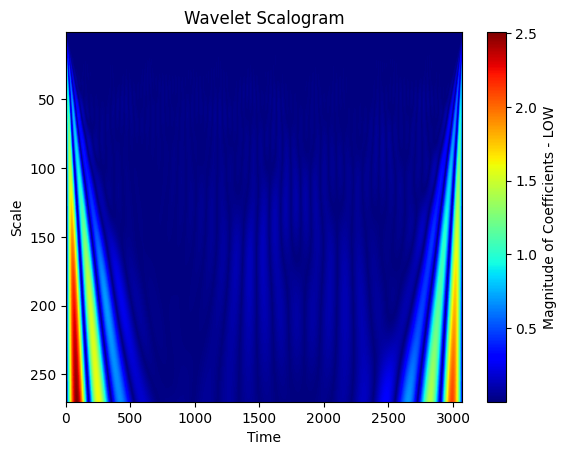

In [36]:
# Optionally, plot the scalogram (wavelet coefficients)
plt.imshow(np.abs(coefficients_low), aspect='auto', extent=[0, len(signal), scales[-1], scales[0]], cmap='jet')
plt.colorbar(label='Magnitude of Coefficients - LOW')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Wavelet Scalogram')
plt.show()


# To use all coefficients and frequencies obtained from CWT as features to train model

# Combined Data - LOW & HIGH

In [37]:
# combine low and high data
# combined_data = downsampled_low_data +downsampled_high_data
combined_data = pd.concat([downsampled_low_data ,downsampled_high_data],ignore_index=True )

display(combined_data)

,0,25,50,75,100,125,150,175,200,225,...,76575,76600,76625,76650,76675,76700,76725,76750,76775,Label
0,-0.768096,-0.767264,-0.766985,-0.766551,-0.766220,-0.766222,-0.766295,-0.766877,-0.767194,-0.767159,...,-0.625762,-0.625692,-0.625635,-0.625633,-0.625922,-0.626125,-0.626085,-0.626168,-0.626094,0
1,0.444947,0.442591,0.438491,0.434242,0.429256,0.424757,0.420226,0.414388,0.407668,0.399800,...,0.338911,0.339241,0.339889,0.340006,0.340245,0.340227,0.339934,0.339856,0.339278,0
2,1.048616,1.054855,1.059988,1.064005,1.067369,1.068896,1.068901,1.066634,1.062327,1.055623,...,0.923950,0.924146,0.924392,0.924755,0.925315,0.925585,0.924976,0.924901,0.924105,0
3,1.248571,1.241279,1.234257,1.226613,1.217721,1.208868,1.199288,1.190406,1.182958,1.178133,...,1.093809,1.094342,1.094642,1.096242,1.098939,1.102214,1.106560,1.110574,1.114086,0
4,0.716353,0.699671,0.686981,0.679240,0.680206,0.691653,0.713868,0.743632,0.780132,0.821420,...,-0.088797,-0.088874,-0.088649,-0.089005,-0.088709,-0.088938,-0.089505,-0.089585,-0.090003,0
5,0.056991,0.058057,0.058687,0.058994,0.059221,0.058929,0.058402,0.057185,0.055534,0.053093,...,-0.028486,-0.028547,-0.028596,-0.028634,-0.028597,-0.028505,-0.028490,-0.028570,-0.029011,0
6,-0.630898,-0.629484,-0.628603,-0.627329,-0.626471,-0.625979,-0.625585,-0.625733,-0.625690,-0.625718,...,-0.505433,-0.505331,-0.505236,-0.505183,-0.505115,-0.505258,-0.504931,-0.504722,-0.504693,0
7,0.023846,0.024359,0.024703,0.025004,0.024692,0.024140,0.023361,0.022442,0.020565,0.018747,...,-0.204173,-0.204281,-0.204384,-0.204497,-0.204264,-0.203966,-0.203653,-0.204317,-0.204400,0
8,-0.859108,-0.858030,-0.857518,-0.857100,-0.857301,-0.857000,-0.857022,-0.857263,-0.857464,-0.857487,...,-0.731815,-0.731774,-0.731457,-0.731500,-0.731848,-0.732102,-0.731766,-0.732434,-0.731736,0
9,-0.650188,-0.649594,-0.649537,-0.648538,-0.648222,-0.647994,-0.648131,-0.648805,-0.649274,-0.650328,...,-0.537191,-0.537680,-0.537303,-0.537556,-0.537505,-0.537956,-0.537920,-0.538003,-0.537961,0


# Below code is without cross validation

In [38]:
# import pandas as pd
# import pywt
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier  # Example ML model
# from sklearn.metrics import accuracy_score

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Import confusion matrix



# # Assuming 'low' is the DataFrame containing the GSR signal and labels

# # Function to extract wavelet coefficients and flatten them
# def extract_wavelet_features(signal, scales, wavelet='morl'):
#     # Perform Continuous Wavelet Transform
#     coefficients, frequencies = pywt.cwt(signal, scales, wavelet)
    
#     # Flatten the coefficients matrix (num_scales x num_time_points) into a 1D array
#     flat_coefficients = coefficients.flatten()
    
#     return flat_coefficients

# # Set the scales for wavelet transform
# # scales = np.arange(1, 128)
# scales = np.arange(1, 271)

# # Prepare the feature matrix and labels
# features = []
# labels = []

# # Iterate over each row in the dataset to extract features
# for index, row in combined_data.iterrows():
#     # Extract the signal from the first column (or both columns if necessary)
#     signal = row[[0, 1]].values  # If you want to use both columns as the signal
#     label = row['Label']
    
    
#     # Extract the flattened wavelet features for the current signal
#     wavelet_features = extract_wavelet_features(signal, scales)
    
#     # Append the features and label to the respective lists
#     features.append(wavelet_features)
#     labels.append(label)

# # Convert the features and labels into NumPy arrays
# features = np.array(features)
# labels = np.array(labels)

# # Split the data into training and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# # Train a Random Forest Classifier as an example
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy * 100:.2f}%")

# # Compute the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)


# # Optional: Print a classification report for additional metrics (precision, recall, f1-score)
# class_report = classification_report(y_test, y_pred)
# print("\nClassification Report:")
# print(class_report)


# Check that cross validation accuracy is similar for all folds


In [39]:
# Checking cross validation metrics

import pandas as pd
import pywt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler , scale, MaxAbsScaler
scaling=StandardScaler()


# Function to extract wavelet coefficients and flatten them
def extract_wavelet_features(signal, scales, wavelet='morl'):
    coefficients, frequencies = pywt.cwt(signal, scales, wavelet)
    flat_coefficients = coefficients.flatten()
    return flat_coefficients

# Set the scales for wavelet transform
scales = np.arange(1, 271)

# Prepare the feature matrix and labels
features = []
labels = []

# # Iterate over each row in the dataset to extract features
# for index, row in combined_data.iterrows():
#     signal = row[[0, 1]].values  # Use both columns as the signal
#     label = row['Label']

# Iterate over each row in the dataset to extract features
for index, row in combined_data.iterrows():
# Extract the signal data from the row (all columns except the last one for label)
    signal = row[:-1].values  # Select all columns except the last one
    label = row['Label']  # The label is assumed to be in the last column   
    
    wavelet_features = extract_wavelet_features(signal, scales)
    features.append(wavelet_features)
    labels.append(label)

# Convert the features and labels into NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,shuffle=True,stratify=labels, random_state=42)

X_train=scaling.fit_transform(X_train)
X_test= scaling.transform(X_test)

# Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation on the training data
cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cross_val, scoring='accuracy')

# Print the accuracy of each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score * 100:.2f}%")

# Print average and standard deviation of the cross-validation accuracy
print(f"\nCross-Validation Accuracy (Mean): {np.mean(cv_scores) * 100:.2f}%")
print(f"Cross-Validation Accuracy (Std): {np.std(cv_scores) * 100:.2f}%")

# Train the model on the entire training set after cross-validation
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {test_accuracy * 100:.2f}%")

# Compute the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest Set Confusion Matrix:")
print(conf_matrix)

# Print the classification report for the test set
class_report = classification_report(y_test, y_pred)
print("\nTest Set Classification Report:")
print(class_report)


Fold 1 Accuracy: 71.43%
Fold 2 Accuracy: 71.43%
Fold 3 Accuracy: 57.14%
Fold 4 Accuracy: 57.14%
Fold 5 Accuracy: 85.71%

Cross-Validation Accuracy (Mean): 68.57%
Cross-Validation Accuracy (Std): 10.69%

Test Set Accuracy: 88.89%

Test Set Confusion Matrix:
[[4 1]
 [0 4]]

Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



# Try other algorithms for classification - do a pipeline 
# Classifiers

In [40]:
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# from sklearn.preprocessing import StandardScaler , scale, MaxAbsScaler

# from sklearn.model_selection import cross_val_score


# scaling=StandardScaler()
# X_train=scaling.fit_transform(X_train)
# X_test= scaling.transform(X_test)

# # clf=SVC()
# # clf.fit(X_train,y_train)

# # clf.score(X_test, y_test)

# # y_pred=clf.predict(X_test)

# # print(classification_report(y_test , y_pred))


# # print(confusion_matrix(y_test , y_pred))


# feature=scale(features)
# clf=LogisticRegressionCV(max_iter=2000).fit(feature, labels)
# clf.score(feature , labels)
# print(classification_report(y_test , y_pred))


# print(confusion_matrix(y_test , y_pred))
# cross_val_score(SVC() , feature, labels, cv=10).mean()

In [41]:
# from sklearn.metrics import accuracy_score , log_loss

# from sklearn.neighbors import KNeighborsClassifier

# from sklearn.svm import SVC , LinearSVC , NuSVC

# from sklearn.tree import DecisionTreeClassifier

# from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

# from sklearn.naive_bayes import GaussianNB

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# from sklearn.linear_model import LogisticRegression

# from sklearn.metrics import f1_score , accuracy_score

# from sklearn.pipeline import Pipeline

# classifiers = [
    
#     KNeighborsClassifier(),
#     SVC(),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis(),
#     LogisticRegression()
# ]

In [42]:
# X,y=features,labels
# accuracy=[]
# accuracy_std = []

# pipeline = Pipeline([('transformer' , StandardScaler()), ('estimator' , clf) ])

# for clfs in classifiers:
#     pipeline.set_params(estimator = clfs)
#     name = clfs.__class__.__name__
    
#     print('='*30)
#     print(name)
#     print('******  Results  ******')
#     scores = cross_val_score(pipeline , X, y , cv=27) # cv determines the cross validation splitting strategy
#     # default cv is 5 to use 5-fold cross validation
    
#     print('Accuracy: {:.4%}'.format(np.array(scores).mean()))
#     accuracy.append(np.array(scores).mean())
#     accuracy_std.append(np.array(scores).std())